### Excel Einlesen

Import

In [106]:
import numpy as np
import pandas as pd

In [107]:
df = pd.read_excel('DF_learnsheet.xlsx')

## Fröhliches aufräumen

### in rot und blau aufteilen, playerid 100 und 200 (rot-ai und blau-ai) wegfiltern, da sowieso indirekt in allen anderen Zahlen enthalten

In [108]:
def getTeamStat(team, df_t):
    return df_t.loc[team]

def teamsInGame(gameid,df_gid):
    return list(df_gid.loc[gameid].index)

def getTeamStats1(row,args):
    return getTeamStat(row[1],args)

def getTeamStats2(row,args):
    return getTeamStat(row[2],args)

def addTeams1(row,args):
    teams = teamsInGame(row[0],args)
    return  teams[0]

def addTeams2(row,args):
    teams = teamsInGame(row[0],args)
    return  teams[1]

def addResult(row, df_gid):
    return df_gid.loc[row[0]]["result"][0]/5

def buildTeamDF(df):
    df = df[~df.playerid.isin([100,200])]
    f_list_sum = [
                "team",
                "gameid",    #pkey1
                "side",      #pkey2
                "result",
                "k",
                "d",
                "a",
                "fb",
                "fbvictim",
                "kpm",        #müsste team kpm bei rum kommen
                "okpm",       #opponentteam kpm
                "fd",
                "ft",
                "teamdragkills",
                "dmgtochamps",
                "dmgtochampsperminute",
                "wards",
                "wardkills",
                "totalgold",
                "goldspent",
                "minionkills",
                "monsterkills",
                "monsterkillsownjungle",
                "monsterkillsenemyjungle",
                "cspm",
                #"csat10",
                #"oppcsat10",
                #"csdat10",
                "goldat10",
                "oppgoldat10",
                "gdat10",
                "goldat15",
                "oppgoldat15",
                #"gdat15",
                #"xpat10",
                "oppxpat10",
                "xpdat10"
             ]
    
    #erstellt eine neue Liste newList aus f_list_sum, in dem die Spalten gameid, side und team entfernt werden
    itemsToRemove = ["gameid","side","team"]
    newList = list(filter(lambda x: x not in itemsToRemove, f_list_sum))
    
    print(newList)
    
    #Wandelt alle Spalten in der Liste newList in einen numerischen Wert um, da beim Import nicht alles 
    #alsNumeric eingelesen wird
    df[newList] = df[newList].apply(pd.to_numeric,args=('errors=coerce',))
    df_m = df[f_list_sum].groupby(["team","gameid"]).sum()

    #ersetzt in der Spalte "result" alle Werte 5 durch den Wert 1 (mittels des Dict di)
    di = {0:0, 5:1}
    df_m["result"].replace(di, inplace=True)
    
    #Pivotisiere mittels Mittelwerte
    df_t = df_m
    df_t = df_t[newList].groupby(["team"]).mean()
    
    #erstelle neuen df df_gid mittels Summe
    df_gid = df[f_list_sum].groupby(["gameid","team"]).sum()
    
    #erstelle Liste der Game Id's und setze sie als Index und Spalte eines neuen DF df_final
    gameids = list(df_gid.index.levels[0])
    df_final = pd.DataFrame(gameids, index=gameids)
    
    #füge df_final die die jeweils an Match mit gid (beretis in df_final enthalten)
    #beteiligten Teams ein
    df_final['team1'] = df_final.apply (addTeams1, args=(df_gid,), axis=1)
    df_final['team2'] = df_final.apply (addTeams2, args=(df_gid,), axis=1)

    #füge für jedes der Teams die (jeweils gemittelten) Stats aus DF df_t ein
    l_t1 = ["t1_" + c for c in df_t.columns]
    l_t2 = ["t2_" + c for c in df_t.columns]

    df_final[l_t1] = df_final.apply (getTeamStats1, args=(df_t,), axis=1)
    df_final[l_t2] = df_final.apply (getTeamStats2, args=(df_t,), axis=1)
    
    #Füge jetzt noch das Endergebnis des Matches ein. Aussage der Spalte "result" ist: Team 1 hat gewonnen
    df_final["result"] = df_final.apply (addResult, args=(df_gid,), axis=1)
    
    return (df_final, df_t)

In [109]:
df_final, df_t = buildTeamDF(df)

['result', 'k', 'd', 'a', 'fb', 'fbvictim', 'kpm', 'okpm', 'fd', 'ft', 'teamdragkills', 'dmgtochamps', 'dmgtochampsperminute', 'wards', 'wardkills', 'totalgold', 'goldspent', 'minionkills', 'monsterkills', 'monsterkillsownjungle', 'monsterkillsenemyjungle', 'cspm', 'goldat10', 'oppgoldat10', 'gdat10', 'goldat15', 'oppgoldat15', 'oppxpat10', 'xpdat10']


/Users/bthorand/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [110]:
df_test, df_t_test = buildTeamDF(pd.read_excel('summersplit.xlsx'))

['result', 'k', 'd', 'a', 'fb', 'fbvictim', 'kpm', 'okpm', 'fd', 'ft', 'teamdragkills', 'dmgtochamps', 'dmgtochampsperminute', 'wards', 'wardkills', 'totalgold', 'goldspent', 'minionkills', 'monsterkills', 'monsterkillsownjungle', 'monsterkillsenemyjungle', 'cspm', 'goldat10', 'oppgoldat10', 'gdat10', 'goldat15', 'oppgoldat15', 'oppxpat10', 'xpdat10']


/Users/bthorand/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


# 2. Deep Learning

via Tensorflow 

In [6]:
import tensorflow as tf
from tensorflow.contrib.layers import batch_norm, fully_connected

In [14]:
k1 = tf.feature_column.numeric_column(df_final["t1_k"])
k2 = tf.feature_column.numeric_column(df_final["t2_k"])

In [ ]:
feat_col = [k1, k2]
dnn_model = tf.estimator.DNNClassifier(feature_columns=feat_col, n_classes=2, hidden_units=[10,10,10])
input_func = tf.estimator.inputs.pandas_input_fn(
    x=df_final[["t1_k","t2_k"]], 
    y=df_final["result"], 
    batch_size=15,
    shuffle = True
)
dnn_model.train(input_fn=input_func, steps=1000)

In [12]:
#
features = np.array(df_final.fillna(0).drop(["result",0,"team1","team2"], axis=1)).astype(np.float32)
labels = np.array(df_final["result"]).astype(np.int32)
#labels = np.transpose([labels, 1-labels])

features_test = np.array(df_test.fillna(0).drop(["result",0,"team1","team2"], axis=1)).astype(np.float32)
labels_test = np.array(df_test["result"]).astype(np.int32)

#data = tf.contrib.data.Dataset.from_tensor_slices((features_placeholder_test, labels_placeholder))
#dataset_test = tf.contrib.data.Dataset.from_tensor_slices(#(features_placeholder_test, labels_placeholder))

#iterator = dataset.make_initializable_iterator()

In [8]:
def elu(z, alpha=1):
    return tf.where(z < 0, alpha * (tf.exp(z) - 1), z)

In [ ]:
def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * tf.where(z >= 0.0, z, alpha * tf.nn.elu(z))

In [ ]:
tf.reset_default_graph()

learning_rate= 0.01

x = tf.placeholder(dtype = features.dtype, shape = (None, 58), name="x")
y = tf.placeholder(dtype = tf.int64, shape=(None), name="y")

is_training = tf.placeholder(tf.bool, shape=(),name="is_training")
bn_params = {
    'is_training': is_training,
    'decay': 0.99,
    'updates_collections': None
}

with tf.contrib.framework.arg_scope(
        [fully_connected],
        normalizer_fn = batch_norm,
        normalizer_params = bn_params):
    hidden1 = fully_connected(x, 400, activation_fn=selu, scope="hidden1")
    #dropout1 = tf.layers.dropout(inputs=hidden1, rate=0.4, training=is_training)

    hidden2 = fully_connected(hidden1, 300, activation_fn=selu, scope="hidden2")
    dropout2 = tf.layers.dropout(inputs=hidden2, rate=0.2, training=is_training)
    
    hidden3 = fully_connected(dropout2, 300, activation_fn=selu, scope="hidden3")
    
    hidden4 = fully_connected(hidden3, 300, activation_fn=selu, scope="hidden4")

    hidden5 = fully_connected(hidden4, 200, activation_fn=selu, scope="hidden5")
    #dropout3 = tf.layers.dropout(inputs=hidden3, rate=0.1, training=is_training)
    
    hidden6 = fully_connected(hidden5, 100, activation_fn=selu, scope="hidden6")
    
    hidden7 = fully_connected(hidden6, 50, activation_fn=selu, scope="hidden7")

    logits = fully_connected(hidden7, 2, activation_fn=None, scope="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
with tf.name_scope("accuracy"):
    one_xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    one = tf.constant(1, dtype=tf.float32) - tf.reduce_mean(one_xentropy, name="one")
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

loss_summary = tf.summary.scalar("Loss", loss)
accuracy_summary = tf.summary.scalar("Accuracy", one)


print("hidden1: ", hidden1)
print("hidden2: ", hidden2)
print("hidden3: ", hidden3)
print("logits: ", logits)
print("loss: ", loss)
#print("predicted_labels: ", correct_pred)


tf.set_random_seed(1234)
loss_summary = tf.summary.scalar("Loss", loss)

with tf.Session() as sess:
    writer = tf.summary.FileWriter("/tmp/tflogs/...", sess.graph)
    init.run()
    
    for i in range(100000):
        sess.run(training_op, feed_dict={is_training: True, x: features, y: labels})
        
        if i % 100 == 0:
            
            summary_str = loss_summary.eval(feed_dict={is_training: False, x: features, y: labels})
            summary_acc = accuracy_summary.eval(feed_dict={is_training: False, x: features, y: labels})
            writer.add_summary(summary_str, i)
            writer.add_summary(summary_acc, i)
            acc_train = accuracy.eval(feed_dict={is_training: False, x: features, y: labels})
            acc_test = accuracy.eval(feed_dict={is_training: False, x: features_test, y: labels_test})
            print(i, "Batch: {0:.1%}".format(acc_train)," --- Validation: {0:.1%}".format(acc_test))

    #print(accuracy.eval(feed_dict={x: features[0]}))
    writer.close()

# 3. XGBoost

In [111]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import matplotlib.pylab as plt

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 16

Hinweis:

habe zwei Formen von XGBoost importiert:

- xgb: hiervon benötige ich die Funktion cv (Cross Validation incoming :])
- XGBClassifer: ist ein sklearn Wrapper für XGBoost. Das wiederum enabled für sklearn's GridSearch inkl. parallel processing <3

### modelfit()

Das ist eine helperfunction über die wir iterieren werden, um die Genauigkeit zu verbessern

In [112]:
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50, verbose=False, metr="auc"):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics=metr, early_stopping_rounds=early_stopping_rounds,verbose_eval=verbose)
        
        alg.set_params(n_estimators=cvresult.shape[0])
        print("best fit for n_estimators: ",cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['result'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
        
    #Print model report:
    print( "\nModel Report")
    print( "Accuracy : %.4g" % metrics.accuracy_score(dtrain['result'].values, dtrain_predictions))
    print( "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['result'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    
    return cvresult.shape[0]

Jetzt noch unseren Trainingsdatensatz, sowie die Zielvariable definieren

## Korrelationen der Features beseitigen

Das Modell funktioniert besser, wenn möglichst unabhängige Features in der Tabelle enthalten sind

In [113]:
df_final.head()

,0,team1,team2,t1_result,t1_k,t1_d,t1_a,t1_fb,t1_fbvictim,t1_kpm,...,t2_monsterkillsenemyjungle,t2_cspm,t2_goldat10,t2_oppgoldat10,t2_gdat10,t2_goldat15,t2_oppgoldat15,t2_oppxpat10,t2_xpdat10,result
20369,20369,Jin Air Green Wings,SK Telecom T1,0.318182,11.295455,13.409091,25.750000,0.522727,0.477273,0.274767,...,85.290323,33.503914,15294.080645,14936.032258,358.048387,24195.725806,23193.145161,18206.838710,257.161290,0.0
20394,20394,BBQ Olivers,MVP,0.363636,9.931818,10.795455,23.431818,0.363636,0.636364,0.271288,...,69.220000,31.358733,14958.940000,15254.280000,-295.340000,23486.660000,23928.820000,18876.880000,-156.520000,1.0
20444,20444,Kongdoo Monster,ROX Tigers,0.266667,8.555556,12.666667,20.333333,0.377778,0.622222,0.229182,...,67.489362,31.951442,15042.957447,15102.808511,-59.851064,23711.553191,23816.276596,18656.978723,-405.680851,0.0
20446,20446,Kongdoo Monster,ROX Tigers,0.266667,8.555556,12.666667,20.333333,0.377778,0.622222,0.229182,...,67.489362,31.951442,15042.957447,15102.808511,-59.851064,23711.553191,23816.276596,18656.978723,-405.680851,0.0
20574,20574,Dark Passage,SuperMassive,0.357143,12.214286,15.642857,26.892857,0.392857,0.607143,0.364456,...,42.673469,29.211099,15265.755102,14929.632653,336.122449,24033.122449,23431.530612,18031.081633,380.367347,0.0


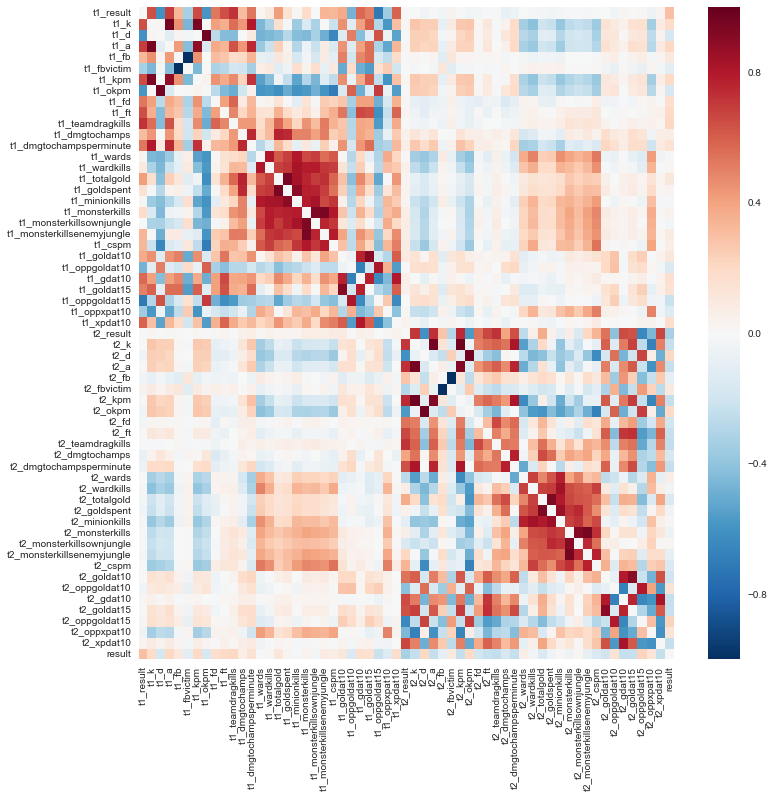

In [114]:
import seaborn as sns
rcParams['figure.figsize'] = 12, 12
corr = df_final.corr()
np.fill_diagonal(corr.values,0)
sns.heatmap(corr)

7


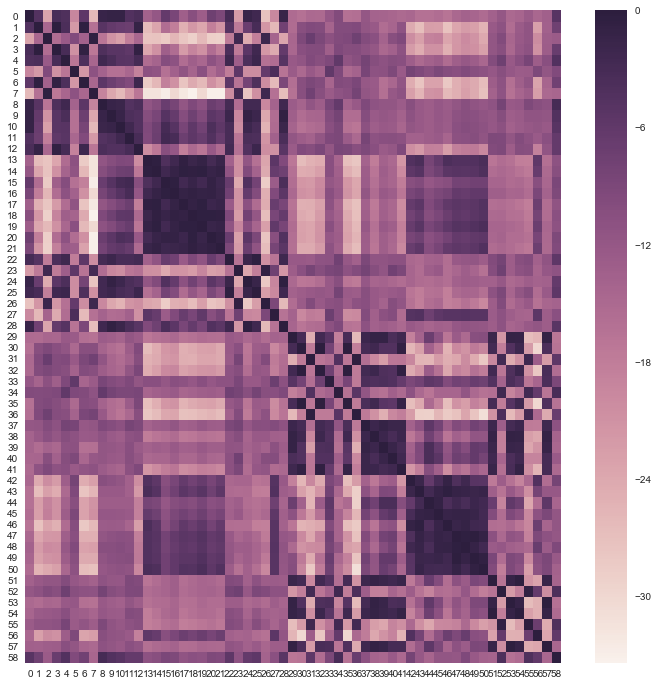

In [115]:
from sklearn.cluster import AffinityPropagation

clf = AffinityPropagation().fit(df_final.corr())


cluster_centers_indices = clf.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)

print(n_clusters_)

sns.heatmap(clf.affinity_matrix_)

In [116]:
print(cluster_centers_indices[1])

9


## Allgemeiner Ansatz für Parametertuning

Wir benutzen einen ähnlichen Ansatz zu GBM

1. Wähle eine relatic hohe learning rate. Allgemein funktioniert eine learning rate (eta) von 0.1 ganz gut. In der Regel variiert man zwischen 0.05 und 0.3. Hier muss man auch austarieren, was "die optimale" Anzahl von Bäumen für das Modell ist. XGB hat hierfür die nützliche Funktion cv (Cross validation), die bei jeder Bossting iteration die optimale Anzahl von Bäumen berechnet und zurückgibt
2. Baumspezifische Parameter tunen. Hier müssen die Parameter max_depth, min_child_weight, gamma, subsample, colsample_bytree optimiert werden. DAs ganze **pro** learning rate und Anzahl Bäumen
3. Regularisierungsparameter müssen hier getuned werden. Das sind lambda und alpha. Hiermit reduzieren wir die Modell-Komplexität und verbessern damit auch gleich die Performance mit
4. learning rate runter setzen und nochmal die Schritte 2 und 3 durchspielen

## Schritt 1

Um uns verbessern zu können, müssen wir überhaupt erst mal Werte initialisieren

- **max_depth = 5** Sollte meistens zwischen 3 und 10 liegen. Meistens nimmt man etwas zwischen 4 und 6.
- **min_child_weight = 3** kleiner Startwert, weil erstens wenig Daten und zweitens (wahrscheinlich) ein unbalanciertes Klassenproblem vorliegt, wodurch die Gruppen für die leaf nodes kleiner ausfallen werden
- **gamma = 0** Hier wählt man idR kleine Werte (0 oder 0,1 bis 0,2) als Startwerte. Wird sowieso noch angepasst.
- **subsample, colsample_bytree = 0.8** Das sind sehr typische Startwerte. Diese werden meistens aus 0,5 - 0,9 gewählt
- **scale_pos_weight = 1:** Wegen der (wahrscheinlichen) Klassenimbalancierung

Es sind nur Startwerde und werden noch verändert

In [168]:
IDcol = '0'
train = df_final
target = 'result'
seed = 27

In [118]:
predictors = [x for x in train.columns if x not in [target, IDcol,"team1","team2",0,"t1_result","t2_result"]]

## Number of Trees

Mittels xgb.cv() lassen wir XGB automatisch für uns den besten Wert für n_estimators (also #Trees) ermitteln

best fit for n_estimators:  7

Model Report
Accuracy : 0.716
AUC Score (Train): 0.818292


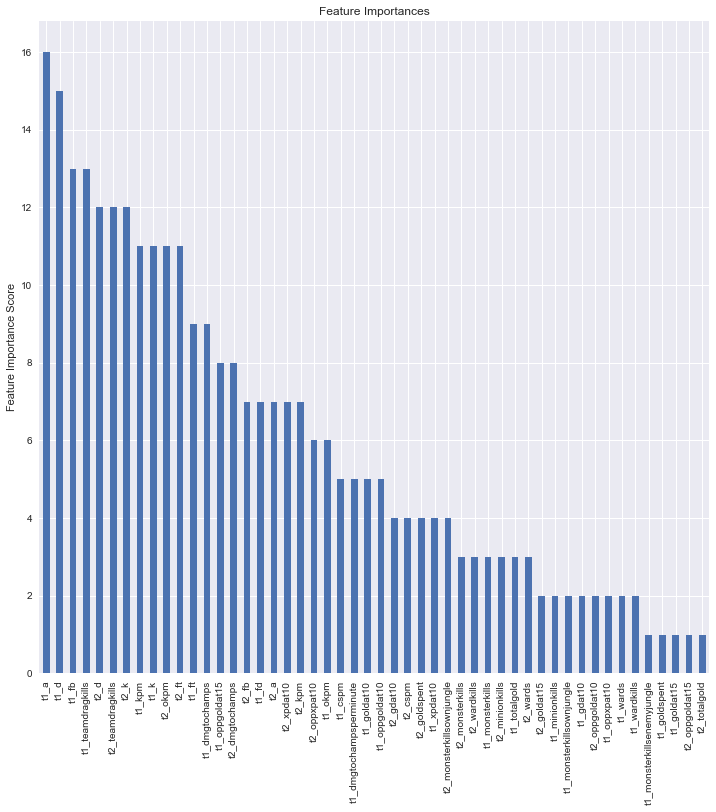

In [119]:
xgb1 = XGBClassifier(
    learning_rate =0.05,
    n_estimators=500,
    max_depth=7,
    min_child_weight=2.5,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=6,
    scale_pos_weight=1.5,
    seed=5
    )
trees = modelfit(xgb1, train, predictors, metr="auc")

## Tune max_depth and min_child_weight

- **max_depth**: Maximale Tiefe des Baumes
- **min_child_weight**: Minimale Anzahl von Fälle, die in ein Child reinfallen. Wird dies unterschritten, findet am der darüberliegenden Knoten im Baum keine Spaltung statt

In [120]:
param_test1 = {
 'max_depth':list(range(3,10,2)),
 'min_child_weight':list(range(3,14,2))
}

In [121]:
gsearch1 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate =0.05,
        n_estimators=trees,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.67713, std: 0.04968, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.67545, std: 0.05239, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.67868, std: 0.05393, params: {'max_depth': 3, 'min_child_weight': 7},
  mean: 0.67438, std: 0.05431, params: {'max_depth': 3, 'min_child_weight': 9},
  mean: 0.67113, std: 0.05866, params: {'max_depth': 3, 'min_child_weight': 11},
  mean: 0.66802, std: 0.05918, params: {'max_depth': 3, 'min_child_weight': 13},
  mean: 0.64633, std: 0.06404, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.64828, std: 0.06381, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.66077, std: 0.06227, params: {'max_depth': 5, 'min_child_weight': 7},
  mean: 0.66730, std: 0.05937, params: {'max_depth': 5, 'min_child_weight': 9},
  mean: 0.66951, std: 0.05338, params: {'max_depth': 5, 'min_child_weight': 11},
  mean: 0.66377, std: 0.04870, params: {'max_depth': 5, 'min_child_weight': 13},
  mean: 0.63588, std: 0.07054, param

In [122]:
gsearch1.best_params_["max_depth"]

3

Lücke von 2 war wahrscheinlich zu grob

In [123]:
param_test2 = {
 'max_depth':list(range(10)),
 'min_child_weight':list(range(14))
}

In [124]:
gsearch2 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate =0.05,
        n_estimators=trees,
        max_depth=gsearch1.best_params_["max_depth"],
        min_child_weight=gsearch1.best_params_["min_child_weight"],
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.50000, std: 0.00000, params: {'max_depth': 0, 'min_child_weight': 0},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 0, 'min_child_weight': 1},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 0, 'min_child_weight': 2},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 0, 'min_child_weight': 3},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 0, 'min_child_weight': 4},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 0, 'min_child_weight': 5},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 0, 'min_child_weight': 6},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 0, 'min_child_weight': 7},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 0, 'min_child_weight': 8},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 0, 'min_child_weight': 9},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 0, 'min_child_weight': 10},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 0, 'min_child_weight': 11},
  mean: 0.50000, std: 0.00000, params:

Also sind

- **max_depth**: <font color='red'>**3**</font>
- **min_child_weight**: <font color='red'>**12**</font>

die Optima

## Tune Gamma

### gamma [default=0]
- A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
- Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned

In [125]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,6)]
}

In [126]:
gsearch3 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate =0.05,
        n_estimators=trees,
        max_depth=gsearch2.best_params_["max_depth"],
        min_child_weight=gsearch2.best_params_["min_child_weight"],
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.67868, std: 0.05393, params: {'gamma': 0.0},
  mean: 0.67868, std: 0.05393, params: {'gamma': 0.1},
  mean: 0.67868, std: 0.05393, params: {'gamma': 0.2},
  mean: 0.67868, std: 0.05393, params: {'gamma': 0.3},
  mean: 0.67868, std: 0.05393, params: {'gamma': 0.4},
  mean: 0.67868, std: 0.05393, params: {'gamma': 0.5}],
 {'gamma': 0.0},
 0.6786790557333915)

Also ist **gamma**=0.3 das Optimum 

## Number of Trees #2

Sollte nun nochmal angepasst werden

best fit for n_estimators:  73

Model Report
Accuracy : 0.6978
AUC Score (Train): 0.792363


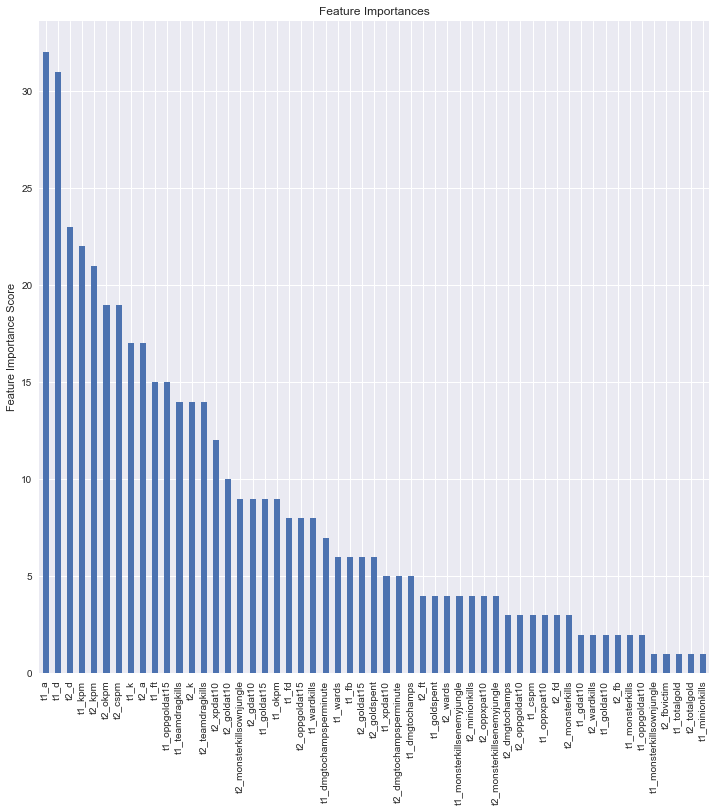

In [127]:
xgb1 = XGBClassifier(
    learning_rate =0.05,
    n_estimators=500,
    max_depth=gsearch2.best_params_["max_depth"],
    min_child_weight=gsearch2.best_params_["min_child_weight"],
    gamma=gsearch3.best_params_["gamma"],
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=6,
    scale_pos_weight=1.5,
    seed=27
    )
trees2 = modelfit(xgb1, train, predictors, metr="auc")

## Tune subsample and colsample_bytree

### 

In [128]:
param_test4 = {
 'subsample':[i/10.0 for i in range(4,10)],
 'colsample_bytree':[i/10.0 for i in range(4,10)]
}

gsearch4 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate =0.05,
        n_estimators=trees2,
        max_depth=gsearch2.best_params_["max_depth"],
        min_child_weight=gsearch2.best_params_["min_child_weight"],
        gamma=gsearch3.best_params_["gamma"],
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.67742, std: 0.07609, params: {'colsample_bytree': 0.4, 'subsample': 0.4},
  mean: 0.67668, std: 0.07209, params: {'colsample_bytree': 0.4, 'subsample': 0.5},
  mean: 0.67642, std: 0.06694, params: {'colsample_bytree': 0.4, 'subsample': 0.6},
  mean: 0.67506, std: 0.06598, params: {'colsample_bytree': 0.4, 'subsample': 0.7},
  mean: 0.67670, std: 0.06397, params: {'colsample_bytree': 0.4, 'subsample': 0.8},
  mean: 0.66718, std: 0.06354, params: {'colsample_bytree': 0.4, 'subsample': 0.9},
  mean: 0.67389, std: 0.07150, params: {'colsample_bytree': 0.5, 'subsample': 0.4},
  mean: 0.67829, std: 0.06336, params: {'colsample_bytree': 0.5, 'subsample': 0.5},
  mean: 0.67760, std: 0.06815, params: {'colsample_bytree': 0.5, 'subsample': 0.6},
  mean: 0.67436, std: 0.06464, params: {'colsample_bytree': 0.5, 'subsample': 0.7},
  mean: 0.67439, std: 0.06777, params: {'colsample_bytree': 0.5, 'subsample': 0.8},
  mean: 0.66495, std: 0.06926, params: {'colsample_bytree': 0.5, 'subsample'

Wir haben also 0.8 und 0.4 als Optima gefunden. Nun wird die 0.05-Umgebung dieser Werte untersucht.

In [129]:
param_test5 = {
 'subsample':[i/100.0 for i in range(35,50,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

gsearch5 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate =0.05,
        n_estimators=trees2,
        max_depth=gsearch2.best_params_["max_depth"],
        min_child_weight=gsearch2.best_params_["min_child_weight"],
        gamma=gsearch3.best_params_["gamma"],
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch5.fit(train[predictors],train[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.67442, std: 0.07910, params: {'colsample_bytree': 0.75, 'subsample': 0.35},
  mean: 0.67655, std: 0.07145, params: {'colsample_bytree': 0.75, 'subsample': 0.4},
  mean: 0.67777, std: 0.07074, params: {'colsample_bytree': 0.75, 'subsample': 0.45},
  mean: 0.67685, std: 0.07865, params: {'colsample_bytree': 0.8, 'subsample': 0.35},
  mean: 0.67669, std: 0.07099, params: {'colsample_bytree': 0.8, 'subsample': 0.4},
  mean: 0.67578, std: 0.06895, params: {'colsample_bytree': 0.8, 'subsample': 0.45},
  mean: 0.67761, std: 0.07508, params: {'colsample_bytree': 0.85, 'subsample': 0.35},
  mean: 0.67569, std: 0.06772, params: {'colsample_bytree': 0.85, 'subsample': 0.4},
  mean: 0.67367, std: 0.07132, params: {'colsample_bytree': 0.85, 'subsample': 0.45}],
 {'colsample_bytree': 0.75, 'subsample': 0.45},
 0.6777727329518429)

=> 0.75 / 0.4

## Tune Regularization Parameters

nun werden (wie der Name schon sagt) die Regulierungsparameter feinjustiert. Diese fokussieren besonders die Vermeidung von Over und Underfitting.

In [130]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch6 = GridSearchCV(
    estimator = XGBClassifier(
        learning_rate =0.05,
        n_estimators=trees2,
        max_depth=gsearch2.best_params_["max_depth"],
        min_child_weight=gsearch2.best_params_["min_child_weight"],
        gamma=gsearch3.best_params_["gamma"],
        subsample=gsearch5.best_params_["subsample"],
        colsample_bytree=gsearch5.best_params_["colsample_bytree"],
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch6.fit(train[predictors],train[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.67777, std: 0.07074, params: {'reg_alpha': 1e-05},
  mean: 0.67952, std: 0.06866, params: {'reg_alpha': 0.01},
  mean: 0.67950, std: 0.07091, params: {'reg_alpha': 0.1},
  mean: 0.68047, std: 0.06823, params: {'reg_alpha': 1},
  mean: 0.50000, std: 0.00000, params: {'reg_alpha': 100}],
 {'reg_alpha': 1},
 0.6804742153117915)

Alpha hat also kaum eine Auswirkung, wird (allein schon wegen Over/Underfitting-Vermeidung) auf 1 gesetzt. Ab hier sollte nochmal CV benutzt werden, zusätzlich wird die Learning Rate klein gesetzt.

best fit for n_estimators:  310

Model Report
Accuracy : 0.6849
AUC Score (Train): 0.778443


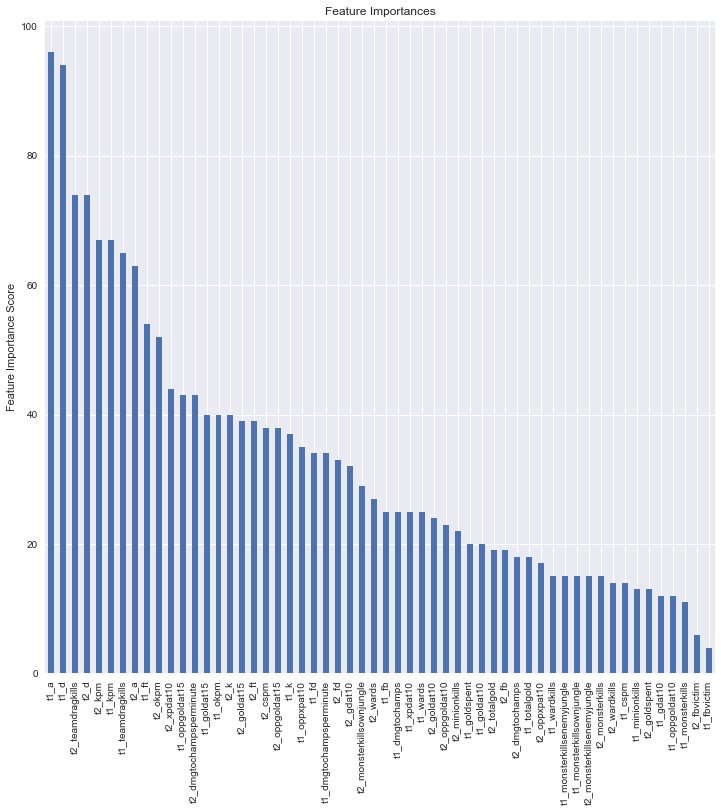

In [131]:
xgb1 = XGBClassifier(
    learning_rate =0.01,
    n_estimators=500,
    max_depth=gsearch2.best_params_["max_depth"],
    min_child_weight=gsearch2.best_params_["min_child_weight"],
    gamma=gsearch3.best_params_["gamma"],
    subsample=gsearch5.best_params_["subsample"],
    colsample_bytree=gsearch5.best_params_["colsample_bytree"],
    objective= 'binary:logistic',
    nthread=6,
    scale_pos_weight=1.5,
    reg_alpha = gsearch6.best_params_["reg_alpha"],
    seed=27
    )
trees3 = modelfit(xgb1, train, predictors, metr="auc")

In [169]:
train_null = train.fillna(0)

def printmetrics(real, pred):
    print("Accuracy: ",metrics.accuracy_score(real, pred))
    print("Precision: ",metrics.precision_score(real, pred))
    print("Recall: ",metrics.recall_score(real, pred))
    print("F1: ",metrics.f1_score(real, pred))

# Naive Bayes

In [133]:
from sklearn.naive_bayes import GaussianNB

In [134]:
gnb = GaussianNB()
gnb.fit(train_null[predictors], train_null["result"])

GaussianNB(priors=None)

In [135]:
printmetrics(train_null["result"], gnb.predict(train_null[predictors]))

Accuracy:  0.659832953683
Precision:  0.664418212479
Recall:  0.612752721617
F1:  0.637540453074


# Linear Classifier

## RidgeClassifierCV

In [136]:
from sklearn.linear_model import RidgeClassifierCV

In [137]:
clf_ridge = RidgeClassifierCV(normalize=True, cv=5)

In [138]:
clf_ridge.fit(train_null[predictors], train_null["result"])

RidgeClassifierCV(alphas=(0.1, 1.0, 10.0), class_weight=None, cv=5,
         fit_intercept=True, normalize=True, scoring=None)

In [139]:
printmetrics(train_null["result"], clf_ridge.predict(train_null[predictors]))

Accuracy:  0.688686408504
Precision:  0.697123519459
Recall:  0.640746500778
F1:  0.667747163695


# SVM

## Poly Kernel

In [140]:
from sklearn.svm import SVC

In [141]:
svm = SVC(probability=True)

In [142]:
svm.fit(train_null[predictors], train_null["result"])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [143]:
printmetrics(train_null["result"], svm.predict(train_null[predictors]))

Accuracy:  0.72741078208
Precision:  0.77626459144
Recall:  0.620528771384
F1:  0.689714779602


In [144]:
printmetrics(train_null["result"], xgb1.predict(train_null[predictors]))

Accuracy:  0.685649202733
Precision:  0.639804639805
Recall:  0.814930015552
F1:  0.71682626539


## Test "real" Data

In [145]:
predictors = [x for x in df_test.columns if x not in [target, IDcol,"team1","team2",0,"t1_result","t2_result"]]

#preds_clf = clf.predict(df_test[predictors])
#pred_prob_clf = clf.predict_proba(df_test[predictors])[:,1]

preds = xgb1.predict(df_test[predictors])
pred_prob = xgb1.predict_proba(df_test[predictors])[:,1]

In [146]:

print("___Summersplit___")
print("Accuracy: ",metrics.accuracy_score(df_test['result'], preds))
print("ROC AUC: ",metrics.roc_auc_score(df_test['result'], pred_prob))
print("F1 Score: ", metrics.f1_score(df_test['result'], preds))
print("Recall Score: ", metrics.recall_score(df_test['result'], preds))
print("Precision Score: ", metrics.precision_score(df_test['result'], preds),"\n")


#print("___GridSearch___")
#print("Accuracy: ",metrics.accuracy_score(df_test['result'], preds_clf))
#print("ROC AUC: ",metrics.roc_auc_score(df_test['result'], pred_prob_clf))
#print("F1 Score: ", metrics.f1_score(df_test['result'], preds_clf))
#print("Recall Score: ", metrics.recall_score(df_test['result'], preds_clf))
#print("Precision Score: ", metrics.precision_score(df_test['result'], preds_clf),"\n")


___Summersplit___
Accuracy:  0.646308724832
ROC AUC:  0.702997461856
F1 Score:  0.688350088705
Recall Score:  0.799450549451
Precision Score:  0.604361370717 



# Stacking!

In [147]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [148]:
lr = LogisticRegression()
sclf = StackingClassifier([gnb, svm, xgb1], 
                          use_probas=True,
                          average_probas=False,
                          meta_classifier=lr)

In [149]:
sclf.fit(train_null[predictors], train_null["result"])

StackingClassifier(average_probas=False,
          classifiers=[GaussianNB(priors=None), SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False), XGBClassifier(base_score=0.5, colsampl...tic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1.5, seed=27, silent=True, subsample=0.45)],
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          use_features_in_secondary=False, use_probas=True, verbose=0)

In [166]:
test_null = df_test.fillna(0)

In [171]:
print("~~~~~Train~~~~~")
print(metrics.classification_report(train_null["result"], sclf.predict(train_null[predictors])))
print("\n\n")
print("~~~~~Test~~~~~")
print(metrics.classification_report(test_null["result"], sclf.predict(test_null[predictors])))

~~~~~Train~~~~~
             precision    recall  f1-score   support

        0.0       0.73      0.73      0.73       674
        1.0       0.71      0.72      0.72       643

avg / total       0.72      0.72      0.72      1317




~~~~~Test~~~~~
             precision    recall  f1-score   support

        0.0       0.68      0.57      0.62       762
        1.0       0.62      0.72      0.67       728

avg / total       0.65      0.65      0.64      1490



In [150]:
printmetrics(train_null["result"], sclf.predict(train_null[predictors]))

Accuracy:  0.722854973424
Precision:  0.71450617284
Recall:  0.720062208398
F1:  0.717273431448


In [89]:
import genetic_algorithm

In [90]:
ga = genetic_algorithm.FeatureSelectionGeneticAlgorithm()

In [94]:
ga.fit(xgb1, _type="classification", X=train_null[predictors], y=train_null["result"])

Iteration 10 Complete [Time Taken For Last Iteration: 52.32 Seconds]
Iteration 20 Complete [Time Taken For Last Iteration: 49.92 Seconds]
Iteration 30 Complete [Time Taken For Last Iteration: 49.77 Seconds]
Iteration 40 Complete [Time Taken For Last Iteration: 58.86 Seconds]
Iteration 50 Complete [Time Taken For Last Iteration: 51.5 Seconds]
Iteration 60 Complete [Time Taken For Last Iteration: 50.95 Seconds]
Iteration 70 Complete [Time Taken For Last Iteration: 52.33 Seconds]
Iteration 80 Complete [Time Taken For Last Iteration: 51.41 Seconds]
Iteration 90 Complete [Time Taken For Last Iteration: 63.88 Seconds]
Iteration 100 Complete [Time Taken For Last Iteration: 58.74 Seconds]


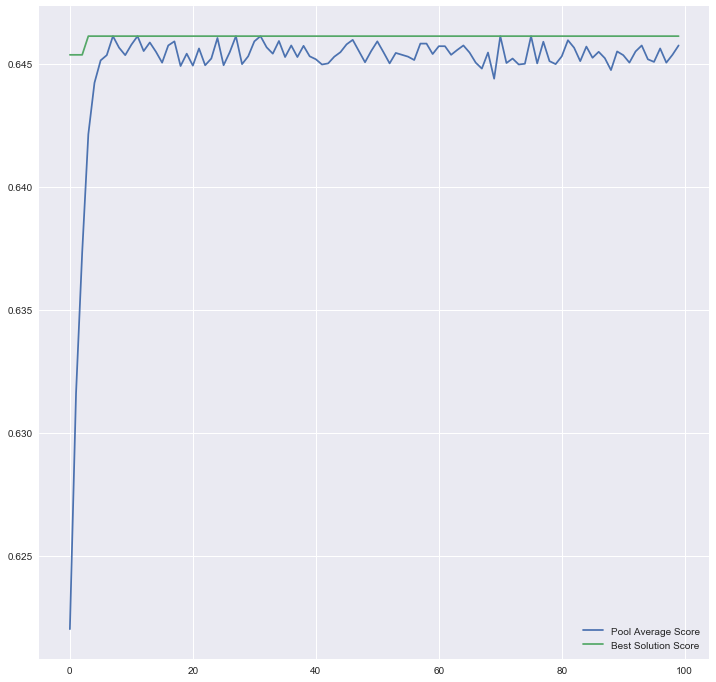

In [95]:
ga.plot_progress()

In [98]:
ga.results()

(array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 1]),
 [1,
  2,
  15,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  28,
  29,
  30,
  33,
  34,
  36,
  39,
  44,
  47,
  48,
  52,
  53,
  55])

In [161]:
train_null[predictors].iloc[:,[1,
  2,
  15,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  28,
  29,
  30,
  33,
  34,
  36,
  39,
  44,
  47,
  48,
  52,
  53,
  55]]

,t1_d,t1_a,t1_goldspent,t1_monsterkills,t1_monsterkillsownjungle,t1_monsterkillsenemyjungle,t1_cspm,t1_goldat10,t1_oppgoldat10,t1_gdat10,...,t2_kpm,t2_okpm,t2_ft,t2_dmgtochampsperminute,t2_minionkills,t2_monsterkillsenemyjungle,t2_cspm,t2_goldat15,t2_oppgoldat15,t2_xpdat10
20369,13.409091,25.750000,68079.704545,185.000000,115.659091,69.340909,32.080966,14996.522727,15168.363636,-171.840909,...,0.454303,0.248642,2.580645,2177.980690,995.161290,85.290323,33.503914,24195.725806,23193.145161,257.161290
20394,10.795455,23.431818,57752.250000,175.159091,104.545455,70.613636,31.964727,14855.863636,15257.522727,-401.659091,...,0.323166,0.385758,1.900000,1948.242519,964.920000,69.220000,31.358733,23486.660000,23928.820000,-156.520000
20444,12.666667,20.333333,60350.800000,166.177778,103.866667,62.311111,32.146102,14943.377778,15133.644444,-190.266667,...,0.341234,0.381591,2.553191,1898.498574,975.680851,67.489362,31.951442,23711.553191,23816.276596,-405.680851
20446,12.666667,20.333333,60350.800000,166.177778,103.866667,62.311111,32.146102,14943.377778,15133.644444,-190.266667,...,0.341234,0.381591,2.553191,1898.498574,975.680851,67.489362,31.951442,23711.553191,23816.276596,-405.680851
20574,15.642857,26.892857,53987.928571,126.321429,85.000000,41.321429,29.309465,14871.071429,15268.392857,-397.321429,...,0.473498,0.424147,3.571429,2145.274876,825.775510,42.673469,29.211099,24033.122449,23431.530612,380.367347
20576,15.642857,26.892857,53987.928571,126.321429,85.000000,41.321429,29.309465,14871.071429,15268.392857,-397.321429,...,0.473498,0.424147,3.571429,2145.274876,825.775510,42.673469,29.211099,24033.122449,23431.530612,380.367347
20581,16.410256,36.051282,58160.641026,141.461538,86.025641,55.435897,30.120432,15062.641026,15213.666667,-151.025641,...,0.359802,0.437487,2.142857,1993.808124,912.250000,49.571429,29.392976,22992.571429,23910.535714,-263.250000
20592,16.410256,36.051282,58160.641026,141.461538,86.025641,55.435897,30.120432,15062.641026,15213.666667,-151.025641,...,0.359802,0.437487,2.142857,1993.808124,912.250000,49.571429,29.392976,22992.571429,23910.535714,-263.250000
20687,16.575758,36.151515,59223.484848,163.242424,98.272727,64.969697,29.208728,15151.939394,14887.757576,264.181818,...,0.444742,0.485375,2.968750,2081.630458,900.343750,53.312500,28.989345,24152.125000,23718.093750,-5.218750
20688,16.575758,36.151515,59223.484848,163.242424,98.272727,64.969697,29.208728,15151.939394,14887.757576,264.181818,...,0.444742,0.485375,2.968750,2081.630458,900.343750,53.312500,28.989345,24152.125000,23718.093750,-5.218750


In [151]:
df_newLOL = pd.read_excel("newLoL.xlsx")

In [152]:
def gibErgVS(t1,t2, model):
    try:
        stat_t1 = getTeamStat(t1,df_t_test)
        stat_t2 = getTeamStat(t2,df_t_test)
    except:
        pass
    
    stat_t1.index = ["t1_" + c for c in stat_t1.index]
    stat_t2.index = ["t2_" + c for c in stat_t2.index]
    
    stat = pd.DataFrame(stat_t1.append(stat_t2)).transpose()
    
    predictors = [x for x in df_test.columns if x not in ['0',"result","team1","team2",0,"t1_result","t2_result"]]
    
    prob = model.predict_proba(stat[predictors])[:,1]
    
    return (prob,stat)
    


In [153]:
prob = []
real_result = []
for row in df_newLOL.itertuples():
    if np.isnan(row[8]):
        continue
        
    try:
        pr, st = gibErgVS(row[3],row[4], ga)
        prob.append(pr[0])
        real_result.append(row[8])
    except:
        pass

stat = pd.Series(prob) > 0.5

print("___REAL___")
print("Accuracy: ",metrics.accuracy_score(real_result, stat))
print("ROC AUC: ",metrics.roc_auc_score(real_result, prob))
print("F1 Score: ", metrics.f1_score(real_result, stat))
print("Recall Score: ", metrics.recall_score(real_result, stat))
print("Precision Score: ", metrics.precision_score(real_result, stat),"\n")

#print(len(prob))

___REAL___
Accuracy:  nan


/Users/bthorand/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/bthorand/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [154]:
conf = pd.DataFrame(metrics.confusion_matrix(real_result, stat))
conf_null = conf[conf != 0]

tn, fp, fn, tp = metrics.confusion_matrix(real_result, stat).ravel()
print(tn, fp, fn, tp) 

sns.set(font_scale=1.4)
rcParams['figure.figsize'] = 6, 6
pal = sns.light_palette("purple", as_cmap=True)

with sns.axes_style("white"):
    sns.heatmap(conf,annot=True, mask = conf_null.isnull(), fmt='g', cbar=False)
    sns.plt.title("Confusion Matrix: Wins vs Losses", fontsize=25)

ValueError: not enough values to unpack (expected 4, got 0)

In [41]:
len(real_result)

234

In [33]:
# LCK                         #EU LCS                     # NA LCS                      # LMS
skt = "SK Telecom T1"       ; vit = "Vitality"          ; p1 = "Phoenix1"             ; fb = "Fire Ball"
jin = "Jin Air Green Wings" ; fnc = "Fnatic"            ; fox = "Echo Fox"            ; fw = "Flash Wolves"
zhu = "Longzhu Gaming"      ; roc = "Roccat"            ; imt = "Immortals"           ; m17 = "Machi 17"
bbq = "BBQ Olivers"         ; uol = "Unicorns of Love"  ; tsm = "Team SoloMid"        ; hka = "Hong Kong Attitude"
af = "Afreeca Freecs"       ; h2k = "H2K"               ; clg = "Counter Logic Gaming"; ahq = "AHQ e-Sports Club"
e8 = "Ever8 Winners"        ; mm = "Mysterious Monkeys" ; c9 = "Cloud9"               ; ws = "Wayi Spider"
rox = "ROX Tigers"          ; g2 = "G2 Esports"         ; tl = "Team Liquid"          ; rg = "Raise Gaming"
mvp = "MVP"                 ; mfs= "Misfits"            ; fq = "FlyQuest"             ; jt = "J Team"
sg = "Samsung Galaxy"       ; spy= "Splyce"             ; dig = "Dignitas"            ;
kt = "KT Rolster"           ; nip= "Ninjas in Pyjamas"  ; nv = "EnVyUs"               ;

In [34]:
prob, stat = gibErgVS(ahq,fb, xgb1) 
print(prob[0])

0.891194


In [35]:
print(np.mean(pred_prob))
print(np.std(pred_prob))

0.576496
0.182997


<function matplotlib.pyplot.show>

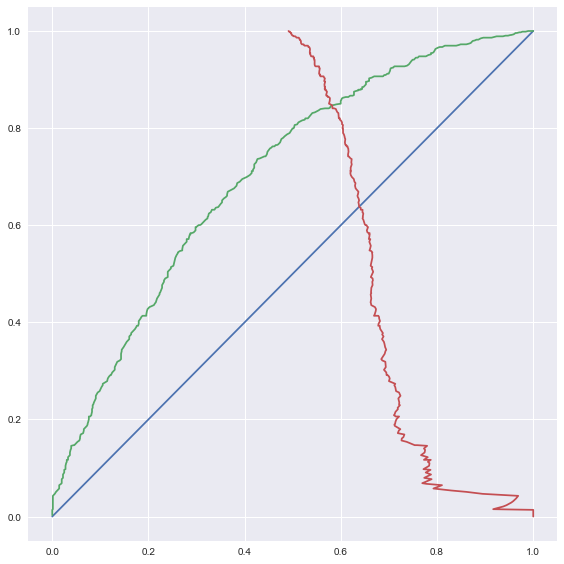

In [39]:
rcParams['figure.figsize'] = 8, 8

#f, (plt1, plt2) = plt.subplots(1,2,sharex=True)

fpr, tpr, treshholds = metrics.roc_curve(df_test['result'], pred_prob)
fpr_sc, tpr_sc, treshholds_sc = metrics.precision_recall_curve(df_test['result'], pred_prob)

#plt.figure(1)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.plot(fpr_sc,tpr_sc)
plt.tight_layout()
plt.show

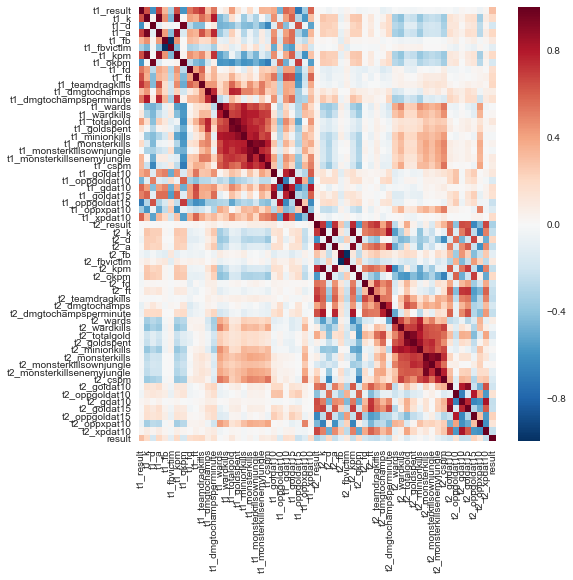

In [40]:
import seaborn as sns
sns.heatmap(df_final.corr())

In [ ]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)

#clf.fit(train[predictors],train[target])
print(len(train[predictors]))
print(len(train[predictors].isnull()))